In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def GetBoxFunctionData(boxmin=0.3, boxmax=0.5, n=1000):
    X = np.random.random((n,1))
    Y = np.zeros((n,1))
    for i in range(n):
        Y[i,0]= 1. if X[i,0]>=boxmin and X[i,0]<boxmax else 0.
    return X,Y
X,Y = GetBoxFunctionData()

In [2]:
import tensorflow.keras
from tensorflow.keras import Sequential as Sequential
import tensorflow.keras.layers as layers

model = Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
model.summary()
model.compile(optimizer="adam", loss='mean_squared_error') 
model.fit(X,Y,epochs=10,verbose=1)

D:\Programme\Python3_8_MiniConda\envs\physics718\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programme\Python3_8_MiniConda\envs\physics718\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programme\Python3_8_MiniConda\envs\physics718\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programme\Python3_8_MiniConda\e

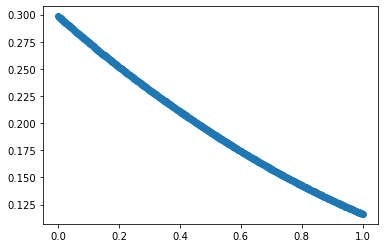

In [3]:
xtest = np.linspace(0.,1.,num=500)
ypred = model.predict(xtest)
plt.scatter(xtest,ypred)


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=5,restore_best_weights=True)
# same model as above
model.summary()
Xtest,Ytest = GetBoxFunctionData(n=100)
model.fit(X,Y,epochs=50,verbose=1,validation_data=(Xtest, Ytest), callbacks=[early_stop])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 0s 56us/sample - loss: 0.1485 - val_loss: 0.1848
Epoch 2/50
1000/1000 [==============================] - 0s 27us/sample - loss: 0.1484 - val_loss: 0.1846
Epoch 3/50
1000/1000 [==============================] - 0s 25us/sample - loss: 0.1483 - val_loss: 0.1844
Epoch 4/50
1000/1000 [==============================] - 0s 24us/sample - loss: 0.1482 - val_loss: 0.1844
Epoch 5/50
1000/1000 [==============================]

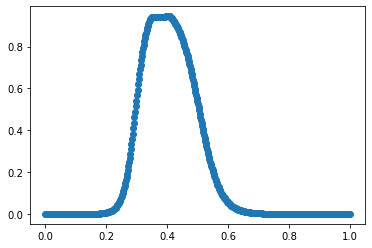

In [5]:
model.fit(X,Y,epochs=5000,verbose=0,validation_data=(Xtest, Ytest), callbacks=[early_stop])
xtest = np.linspace(0.,1.,num=500)
ypred = model.predict(xtest)
plt.scatter(xtest,ypred)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


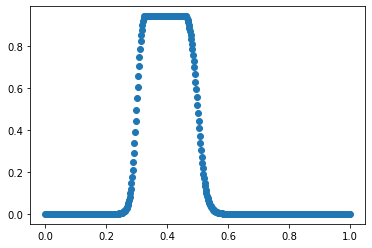

In [6]:
import tensorflow.keras.regularizers as regularizers
model = Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(100, activation="relu", activity_regularizer=regularizers.l1(0.01)),
    layers.Dense(1, activation="sigmoid", activity_regularizer=regularizers.l1(0.01))
    ])
model.summary()
model.compile(optimizer="adam", loss='mean_squared_error') 
model.fit(X,Y,epochs=1000,verbose=0)

xtest = np.linspace(0.,1.,num=500)
ypred = model.predict(xtest)
plt.scatter(xtest,ypred)